# Stats and Probability Practical (LED Bulb Project) by `Mr. Harshit Dawar!`

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [3]:
df = pd.read_csv("LED Bulb - LED Bulb.csv.csv")
df

,ProductId,Defect,Assembly Line
0,P116731,0,2
1,P435720,1,1
2,P113177,0,2
3,P488442,0,1
4,P188067,0,2
...,...,...,...
195,P344545,0,3
196,P439833,0,2
197,P382963,0,3
198,P308993,0,1


#### Q1. Check number of rows and columns

In [5]:
df.shape

(200, 3)

#### Q2. How many variables are numericals vs categorical?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ProductId      200 non-null    object
 1   Defect         200 non-null    int64 
 2   Assembly Line  200 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


In [8]:
df.isna().sum()

ProductId        0
Defect           0
Assembly Line    0
dtype: int64

In [9]:
df.dtypes

ProductId        object
Defect            int64
Assembly Line     int64
dtype: object

In [10]:
df["Defect"].unique()

array([0, 1], dtype=int64)

In [13]:
df["Assembly Line"].unique()

array([2, 1, 3], dtype=int64)

## Observations

#### Q3. Are there any inconsistencies withi the data? For instance, nulls, duplicates, outliers or garbage values

In [11]:
df.duplicated().sum()

0

In [12]:
df.describe()

,Defect,Assembly Line
count,200.000000,200.000000
mean,0.080000,1.975000
std,0.271974,0.798475
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,0.000000,3.000000
max,1.000000,3.000000


In [20]:
df.Defect.value_counts().index.values

array([0, 1], dtype=int64)

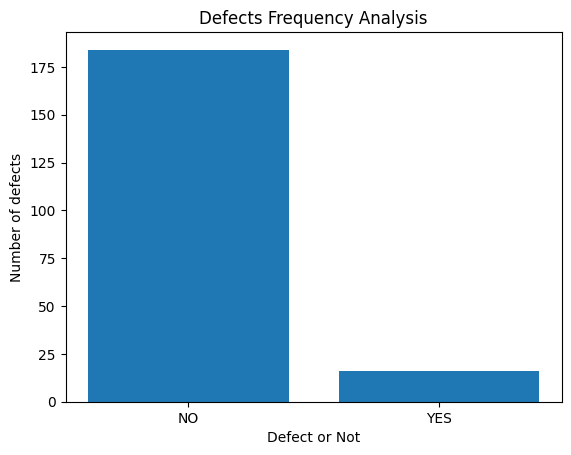

In [39]:
plt.bar(df.Defect.value_counts().index.values, df.Defect.value_counts().values)
plt.xticks(ticks = range(0, 2), labels = ["NO", "YES"])
plt.xlabel("Defect or Not")
plt.ylabel("Number of defects")
plt.title("Defects Frequency Analysis")
plt.show()

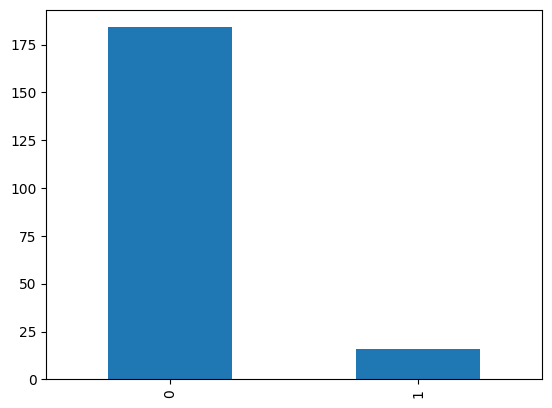

In [33]:
df.Defect.value_counts().plot(kind = "bar")
plt.show()

In [49]:
df.Defect.value_counts()

0    184
1     16
Name: Defect, dtype: int64

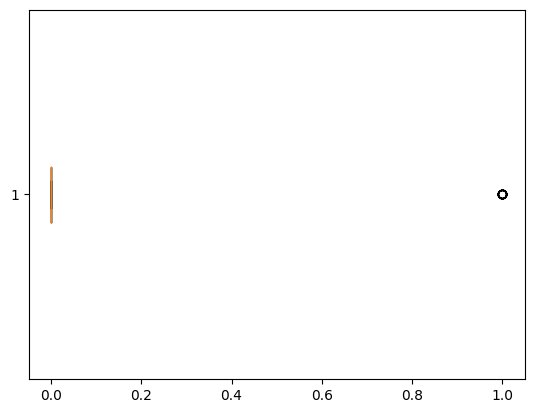

In [48]:
plt.boxplot(df.Defect, vert = False)
plt.show()

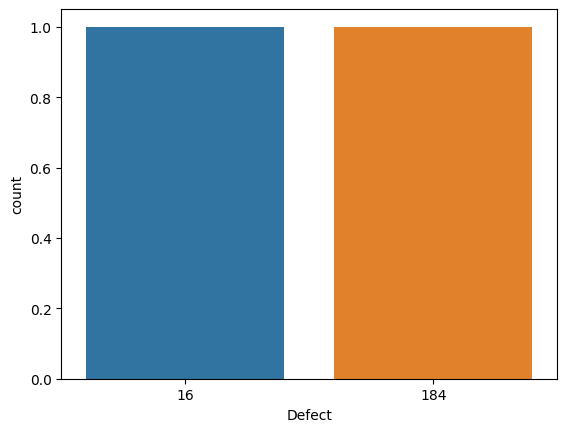

In [62]:
sns.countplot(data = df, x = df.Defect.value_counts())
plt.show()

## Observations

#### Q4. Perform univariate analysis on the variables

In [67]:
df.Defect

0      0
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: Defect, Length: 200, dtype: int64

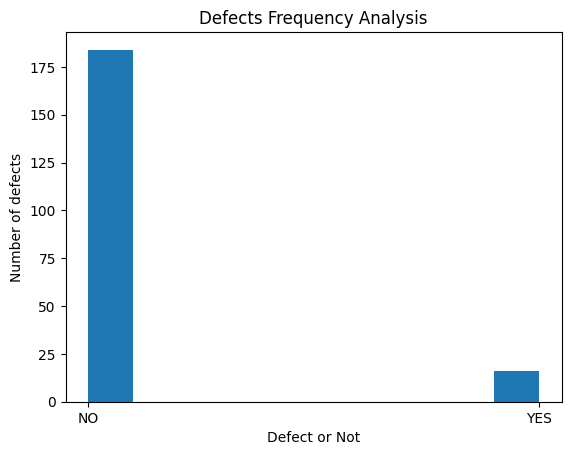

In [66]:
plt.hist(df.Defect)
plt.xticks(ticks = range(0, 2), labels = ["NO", "YES"])
plt.xlabel("Defect or Not")
plt.ylabel("Number of defects")
plt.title("Defects Frequency Analysis")
plt.show()

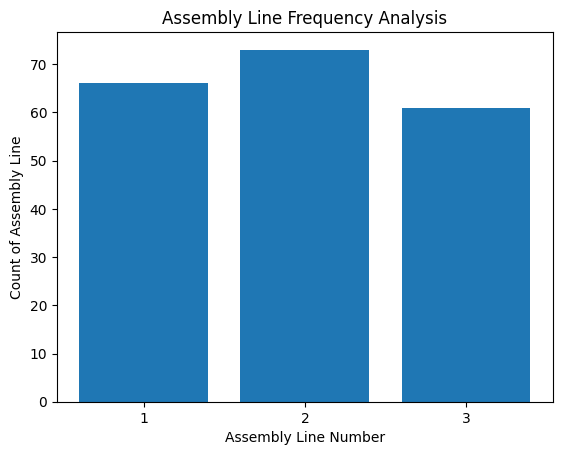

In [75]:
plt.bar(df["Assembly Line"].value_counts().index.values, df["Assembly Line"].value_counts().values)
plt.xticks(ticks = range(1, 4), labels = [1,2,3])
plt.xlabel("Assembly Line Number")
plt.ylabel("Count of Assembly Line")
plt.title("Assembly Line Frequency Analysis")
plt.show()

## Observations

#### Q5. Perform bivariate analysis on the variables

In [77]:
df

,ProductId,Defect,Assembly Line
0,P116731,0,2
1,P435720,1,1
2,P113177,0,2
3,P488442,0,1
4,P188067,0,2
...,...,...,...
195,P344545,0,3
196,P439833,0,2
197,P382963,0,3
198,P308993,0,1


In [80]:
df.corr()

C:\Users\harsh\AppData\Local\Temp\ipykernel_3164\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Defect,Assembly Line
Defect,1.000000,0.055535
Assembly Line,0.055535,1.000000


In [83]:
pd.crosstab(index = df["Assembly Line"], columns = df["Defect"])

Defect,0,1
Assembly Line,,
1,61,5
2,69,4
3,54,7


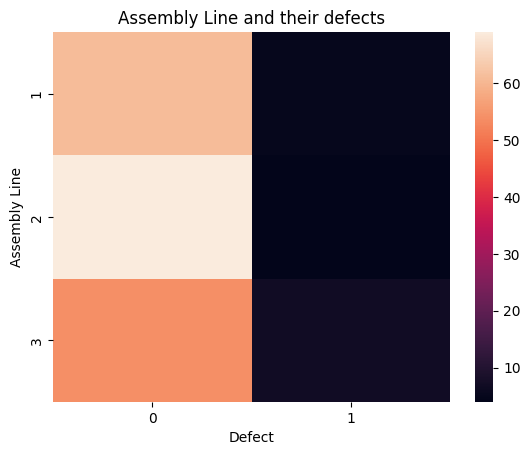

In [85]:
sns.heatmap(pd.crosstab(index = df["Assembly Line"], columns = df["Defect"]))
plt.title("Assembly Line and their defects")
plt.show()

In [87]:
cross_result = pd.crosstab(index = df["Assembly Line"], columns = df["Defect"]).values
cross_result

array([[61,  5],
       [69,  4],
       [54,  7]], dtype=int64)

In [88]:
cross_result[:, 0]

array([61, 69, 54], dtype=int64)

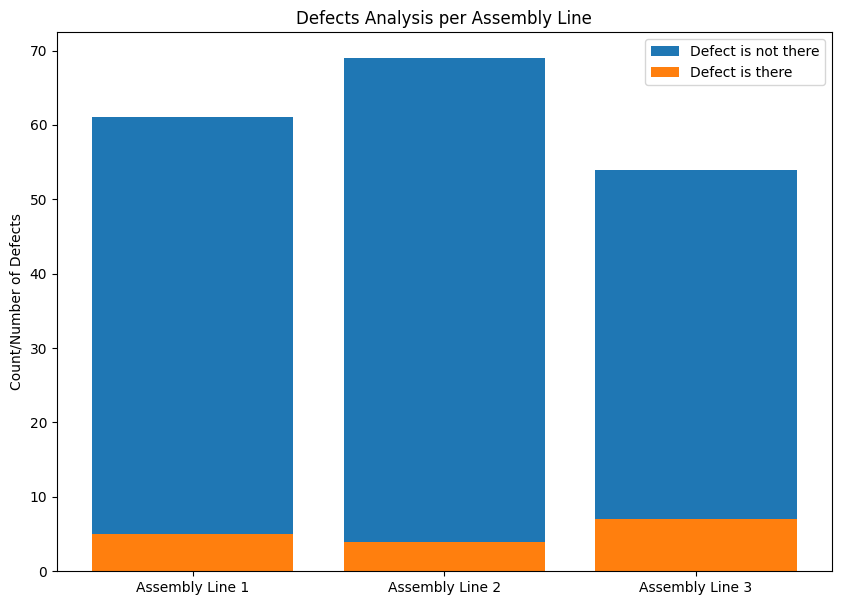

In [95]:
plt.figure(figsize = (10 , 7))
x = ["Assembly Line 1", "Assembly Line 2", "Assembly Line 3"]
plt.bar(x, cross_result[:, 0], label = "Defect is not there")
plt.bar(x, cross_result[:, 1], label = "Defect is there")
plt.ylabel("Count/Number of Defects")
plt.title("Defects Analysis per Assembly Line")
plt.legend()
plt.show()

#### Q6. Determine the probabilities for defects in individual assemble lines and plot it using visualization.

In [104]:
ad = df.groupby("Assembly Line").agg({"Defect" : ["sum", "count"]}).reset_index()
ad

Assembly Line Defect      
                   sum count
0             1      5    66
1             2      4    73
2             3      7    61

In [106]:
ad.columns = ["Assembly Line", "Total_Defects", "Total_Observations"]
ad

,Assembly Line,Total_Defects,Total_Observations
0,1,5,66
1,2,4,73
2,3,7,61


In [107]:
ad["Probability_of_Defect"] = ad.Total_Defects / ad.Total_Observations
ad

,Assembly Line,Total_Defects,Total_Observations,Probability_of_Defect
0,1,5,66,0.075758
1,2,4,73,0.054795
2,3,7,61,0.114754


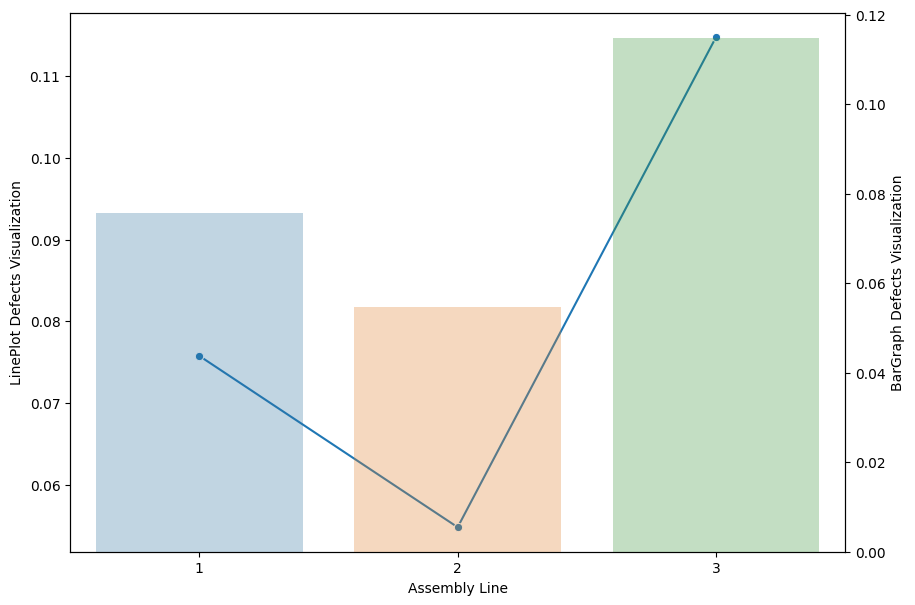

In [135]:
# sns.set_style(rc = None)
# sns.lineplot(ad.Probability_of_Defect)
fig, ax = plt.subplots(figsize = (10, 7))
sns.lineplot(data = ad.Probability_of_Defect, ax = ax, marker = "o")
ax2 = ax.twinx()
sns.barplot(data = ad, x = "Assembly Line", y = "Probability_of_Defect", ax = ax2, alpha = 0.3)
ax.set_ylabel("LinePlot Defects Visualization")
ax2.set_ylabel("BarGraph Defects Visualization")
ax.set_xlabel("Assembly Line")
plt.show()

## Observations

#### Q7. With the calculated probabilities, let's try to answer following questions for 20 samples drawn at random from different assembly lines.

#### 7.1. Check out the binomial distributions of probabilities from 0 to 20 defects from 20 samples drawn at random from 3 different assembly lines


## Observations:

#### 7.2. What is the probability that two or fewer of the LED bulbs are defective for assembly line 1?

**7.3. What is the probability that at least 3 of the LED bulbs are defective for assembly line 1?**

#### 7.4 Which number of success witness the highest chances of occurrence in assembly line 3?